### Load data first

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import time
import sys

sys.path.append(os.path.abspath(".."))   # Add root path to sys.path
os.chdir("..")  # Change working directory to root path

from src.preprocessing import read_image, windy_preprocessing_pipeline
from tqdm import tqdm
from datetime import datetime


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
from src.preprocessing import read_numpy_grid, nexrad_numpy_preprocessing_pipeline
from tqdm import tqdm

data_name = "KARX"
SOURCE_PATH = f"data/numpy_grid/{data_name}"

img_paths = [
    os.path.join(SOURCE_PATH, img_name) for img_name in sorted(os.listdir(SOURCE_PATH)) if img_name.endswith('.npy')
]

img_shape = read_numpy_grid(img_paths[0]).shape       # get shape of the image

print(f"Image shape: {img_shape}")
print(f"-" * 20)

time_frames = []
dbz_maps = []

for path in tqdm(img_paths, desc="Processing images and detecting storms"):
    file_name = path.split("/")[-1].split(".")[0]
    # time_frames.append(datetime.strptime(file_name[:-4], '%Y%m%d-%H%M%S'))       # Get file name without extension
    time_frames.append(datetime.strptime(file_name[4:19], "%Y%m%d_%H%M%S"))       # Get file name without extension
    img = read_numpy_grid(path)
    dbz_maps.append(nexrad_numpy_preprocessing_pipeline(img))

FIRST_TIME_FRAME = time_frames[0]

print(f"Number of frames: {len(dbz_maps)}")

Image shape: (901, 901)
--------------------


Processing images and detecting storms: 100%|██████████| 93/93 [00:00<00:00, 689.05it/s]

Number of frames: 93


In [3]:
# file_name = "philippines_13.269_123.832"

# SOURCE_PATH = f"data/image_old/{file_name}"

# img_paths = [
#     os.path.join(SOURCE_PATH, img_name) for img_name in sorted(os.listdir(SOURCE_PATH)) if img_name.endswith('.png')
# ][:20]

# img_shape = read_image(img_paths[0]).shape       # get shape of the image
# print(f"Image shape: {img_shape}")
# print(f"-" * 20)

# time_frames = []
# dbz_maps = []       

# for path in tqdm(img_paths, desc="Processing images and detecting storms"):
#     time_frames.append(datetime.strptime(os.path.basename(path).split('/')[0][:-4], '%Y%m%d-%H%M%S'))       # Get file name without extension
#     img = read_image(path)
#     dbz_maps.append(windy_preprocessing_pipeline(img))

# print(f"Number of frames: {len(dbz_maps)}")

## Load model

In [4]:
from src.models import OursPrecipitationModel
from src.identification import HypothesisIdentifier

model = OursPrecipitationModel(identifier=HypothesisIdentifier())

storms_maps = []
# pbar = tqdm(zip(dbz_maps, time_frames), total=len(dbz_maps), desc="Detecting storms")
pbar = zip(dbz_maps, time_frames)

for idx, (dbz_map, time_frame) in enumerate(pbar):
    storms_map = model.identify_storms(dbz_map, time_frame, map_id=f"time_{idx}", threshold=35, filter_area=50)
    storms_maps.append(storms_map)

    if (idx + 1) % 10 == 0:
        print(f"Processed {idx + 1} / {len(dbz_maps)} frames.")

Constructing shape vectors for time_0_storm_0:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_0_storm_1:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_0:   0%|          | 0/33 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_1:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_1_storm_2:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_2_storm_0:   0%|          | 0/34 [00:00<?, ?it/s]

Constructing shape vectors for time_2_storm_1:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_2_storm_2:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_3_storm_0:   0%|          | 0/35 [00:00<?, ?it/s]

Constructing shape vectors for time_3_storm_1:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_3_storm_2:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_4_storm_0:   0%|          | 0/35 [00:00<?, ?it/s]

Constructing shape vectors for time_4_storm_1:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_4_storm_2:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_4_storm_3:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_5_storm_0:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_5_storm_1:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_5_storm_2:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_0:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_1:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_2:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_6_storm_3:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_7_storm_0:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_7_storm_1:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_7_storm_2:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_0:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_1:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_2:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_3:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_8_storm_4:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_0:   0%|          | 0/36 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_1:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_2:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_3:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_4:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_5:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_6:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_7:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_9_storm_8:   0%|          | 0/1 [00:00<?, ?it/s]

Processed 10 / 93 frames.


Constructing shape vectors for time_10_storm_0:   0%|          | 0/37 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_1:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_2:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_3:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_4:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_5:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_10_storm_6:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_0:   0%|          | 0/37 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_1:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_2:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_3:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_4:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_5:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_6:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_11_storm_7:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_0:   0%|          | 0/37 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_1:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_2:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_3:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_4:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_5:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_6:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_7:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_12_storm_8:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_0:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_1:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_2:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_3:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_4:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_5:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_6:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_7:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_8:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_9:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_10:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_11:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_13_storm_12:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_0:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_1:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_2:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_3:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_4:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_5:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_6:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_7:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_8:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_9:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_10:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_11:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_12:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_14_storm_13:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_0:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_1:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_2:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_3:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_4:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_5:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_6:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_7:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_8:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_9:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_10:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_11:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_12:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_13:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_15_storm_14:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_0:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_1:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_2:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_3:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_4:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_5:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_6:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_7:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_8:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_9:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_10:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_11:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_12:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_16_storm_13:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_0:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_1:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_2:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_3:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_4:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_5:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_6:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_7:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_8:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_9:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_10:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_12:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_17_storm_13:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_0:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_1:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_2:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_3:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_4:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_5:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_6:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_7:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_8:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_9:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_10:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_12:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_13:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_14:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_18_storm_15:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_0:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_1:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_2:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_3:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_4:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_5:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_6:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_7:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_8:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_9:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_10:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_12:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_19_storm_13:   0%|          | 0/3 [00:00<?, ?it/s]

Processed 20 / 93 frames.


Constructing shape vectors for time_20_storm_0:   0%|          | 0/37 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_1:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_2:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_3:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_4:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_5:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_6:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_7:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_8:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_9:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_10:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_11:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_12:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_13:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_20_storm_14:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_0:   0%|          | 0/37 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_1:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_2:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_3:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_4:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_5:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_6:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_7:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_8:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_9:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_10:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_11:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_12:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_13:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_21_storm_14:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_0:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_1:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_2:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_3:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_4:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_5:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_6:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_7:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_8:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_9:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_10:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_12:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_22_storm_13:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_0:   0%|          | 0/32 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_1:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_2:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_3:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_4:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_5:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_6:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_7:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_8:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_9:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_10:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_11:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_12:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_13:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_14:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_23_storm_15:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_0:   0%|          | 0/38 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_1:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_2:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_3:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_4:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_5:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_6:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_7:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_8:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_9:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_10:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_11:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_24_storm_12:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_0:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_1:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_2:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_3:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_4:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_5:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_6:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_7:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_8:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_9:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_10:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_11:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_12:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_13:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_14:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_15:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_16:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_17:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_18:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_19:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_25_storm_20:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_0:   0%|          | 0/36 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_1:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_2:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_3:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_4:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_5:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_6:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_7:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_8:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_9:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_10:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_11:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_12:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_13:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_14:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_15:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_16:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_17:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_18:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_19:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_26_storm_20:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_0:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_1:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_2:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_3:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_4:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_5:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_6:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_7:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_8:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_9:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_10:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_11:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_12:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_13:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_14:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_15:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_16:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_17:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_18:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_19:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_20:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_21:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_22:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_23:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_27_storm_24:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_0:   0%|          | 0/42 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_1:   0%|          | 0/32 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_2:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_3:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_4:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_5:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_6:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_7:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_8:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_9:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_10:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_11:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_12:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_13:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_14:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_15:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_16:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_17:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_18:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_19:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_20:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_28_storm_21:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_0:   0%|          | 0/35 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_1:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_2:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_3:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_4:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_5:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_6:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_7:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_8:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_9:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_10:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_11:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_12:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_13:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_14:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_15:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_16:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_17:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_18:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_19:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_20:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_21:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_29_storm_22:   0%|          | 0/1 [00:00<?, ?it/s]

Processed 30 / 93 frames.


Constructing shape vectors for time_30_storm_0:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_1:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_2:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_3:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_4:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_5:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_6:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_7:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_8:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_9:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_10:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_11:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_12:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_13:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_14:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_15:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_16:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_17:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_18:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_19:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_20:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_21:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_22:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_23:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_30_storm_24:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_0:   0%|          | 0/36 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_1:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_2:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_3:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_4:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_5:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_6:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_7:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_8:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_9:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_10:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_11:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_12:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_13:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_14:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_15:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_16:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_17:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_18:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_31_storm_19:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_0:   0%|          | 0/56 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_1:   0%|          | 0/38 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_2:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_3:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_4:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_5:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_6:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_7:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_8:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_9:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_10:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_11:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_12:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_13:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_14:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_15:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_16:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_17:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_32_storm_18:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_0:   0%|          | 0/45 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_1:   0%|          | 0/44 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_2:   0%|          | 0/40 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_3:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_4:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_5:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_6:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_7:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_8:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_9:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_10:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_11:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_12:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_13:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_14:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_15:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_16:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_17:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_18:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_19:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_20:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_21:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_33_storm_22:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_0:   0%|          | 0/43 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_1:   0%|          | 0/39 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_2:   0%|          | 0/33 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_3:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_4:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_5:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_6:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_7:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_8:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_9:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_10:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_11:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_12:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_13:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_14:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_15:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_16:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_17:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_18:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_19:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_20:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_21:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_22:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_23:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_24:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_34_storm_25:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_0:   0%|          | 0/47 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_1:   0%|          | 0/34 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_2:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_3:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_4:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_5:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_6:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_7:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_8:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_9:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_10:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_11:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_12:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_13:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_14:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_15:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_16:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_17:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_18:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_19:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_20:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_21:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_22:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_23:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_24:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_25:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_26:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_27:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_28:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_35_storm_29:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_0:   0%|          | 0/41 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_1:   0%|          | 0/40 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_2:   0%|          | 0/32 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_3:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_4:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_5:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_6:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_7:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_8:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_9:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_10:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_11:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_12:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_13:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_14:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_15:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_16:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_17:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_18:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_19:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_20:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_21:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_22:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_23:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_24:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_25:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_26:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_36_storm_27:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_0:   0%|          | 0/46 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_1:   0%|          | 0/33 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_2:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_3:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_4:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_5:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_6:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_7:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_8:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_9:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_10:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_11:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_12:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_13:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_14:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_15:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_16:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_17:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_18:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_19:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_20:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_21:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_22:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_23:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_24:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_25:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_26:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_37_storm_27:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_0:   0%|          | 0/50 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_1:   0%|          | 0/41 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_2:   0%|          | 0/34 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_3:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_4:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_5:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_6:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_7:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_8:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_9:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_10:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_11:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_12:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_13:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_14:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_15:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_16:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_17:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_18:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_19:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_20:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_21:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_22:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_38_storm_23:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_0:   0%|          | 0/65 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_1:   0%|          | 0/49 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_2:   0%|          | 0/37 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_3:   0%|          | 0/35 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_4:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_5:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_6:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_7:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_8:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_9:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_10:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_11:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_12:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_13:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_14:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_15:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_16:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_17:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_18:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_19:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_39_storm_20:   0%|          | 0/1 [00:00<?, ?it/s]

Processed 40 / 93 frames.


Constructing shape vectors for time_40_storm_0:   0%|          | 0/51 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_1:   0%|          | 0/47 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_2:   0%|          | 0/42 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_3:   0%|          | 0/35 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_4:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_5:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_6:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_7:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_8:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_9:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_10:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_11:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_12:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_13:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_14:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_15:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_16:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_17:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_18:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_19:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_20:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_21:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_22:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_23:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_40_storm_24:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_0:   0%|          | 0/51 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_1:   0%|          | 0/45 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_2:   0%|          | 0/36 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_3:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_4:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_5:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_6:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_7:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_8:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_9:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_10:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_11:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_12:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_13:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_14:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_15:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_16:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_17:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_18:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_19:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_20:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_21:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_22:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_23:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_24:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_25:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_26:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_27:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_28:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_29:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_30:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_31:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_32:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_33:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_34:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_41_storm_35:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_0:   0%|          | 0/58 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_1:   0%|          | 0/41 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_2:   0%|          | 0/39 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_3:   0%|          | 0/32 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_4:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_5:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_6:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_7:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_8:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_9:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_10:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_11:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_12:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_13:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_14:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_15:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_16:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_17:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_18:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_19:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_20:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_21:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_22:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_23:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_24:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_25:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_26:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_27:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_28:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_29:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_30:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_42_storm_31:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_0:   0%|          | 0/79 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_1:   0%|          | 0/45 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_2:   0%|          | 0/43 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_3:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_4:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_5:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_6:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_7:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_8:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_9:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_10:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_11:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_12:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_13:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_14:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_15:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_16:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_17:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_18:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_19:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_20:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_21:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_22:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_23:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_24:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_25:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_26:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_27:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_28:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_29:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_30:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_31:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_32:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_33:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_34:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_35:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_36:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_37:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_43_storm_38:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_0:   0%|          | 0/55 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_1:   0%|          | 0/50 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_2:   0%|          | 0/33 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_3:   0%|          | 0/32 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_4:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_5:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_6:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_7:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_8:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_9:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_10:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_11:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_12:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_13:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_14:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_15:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_16:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_17:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_18:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_19:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_20:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_21:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_22:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_23:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_24:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_25:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_26:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_27:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_28:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_29:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_30:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_31:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_44_storm_32:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_0:   0%|          | 0/53 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_1:   0%|          | 0/48 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_2:   0%|          | 0/47 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_3:   0%|          | 0/40 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_4:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_5:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_6:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_7:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_8:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_9:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_10:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_11:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_12:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_13:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_14:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_15:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_16:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_17:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_18:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_19:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_20:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_21:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_22:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_23:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_24:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_25:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_26:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_27:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_28:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_29:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_30:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_31:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_32:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_33:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_34:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_45_storm_35:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_0:   0%|          | 0/51 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_1:   0%|          | 0/47 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_2:   0%|          | 0/32 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_3:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_4:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_5:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_6:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_7:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_8:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_9:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_10:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_11:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_12:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_13:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_14:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_15:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_16:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_17:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_18:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_19:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_20:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_21:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_22:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_23:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_24:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_25:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_26:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_27:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_28:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_29:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_30:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_31:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_32:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_33:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_34:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_35:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_36:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_46_storm_37:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_0:   0%|          | 0/107 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_1:   0%|          | 0/43 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_2:   0%|          | 0/32 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_3:   0%|          | 0/32 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_4:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_5:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_6:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_7:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_8:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_9:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_10:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_11:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_12:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_13:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_14:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_15:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_16:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_17:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_18:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_19:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_20:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_21:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_22:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_23:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_24:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_25:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_26:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_27:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_28:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_29:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_30:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_31:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_32:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_33:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_34:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_35:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_36:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_37:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_38:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_39:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_40:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_41:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_42:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_43:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_44:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_45:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_46:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_47:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_48:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_49:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_50:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_47_storm_51:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_0:   0%|          | 0/171 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_1:   0%|          | 0/33 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_2:   0%|          | 0/32 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_3:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_4:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_5:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_6:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_7:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_8:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_9:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_10:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_11:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_12:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_13:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_14:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_15:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_16:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_17:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_18:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_19:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_20:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_21:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_22:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_23:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_24:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_25:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_26:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_27:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_28:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_29:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_30:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_31:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_32:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_33:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_34:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_35:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_36:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_37:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_38:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_39:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_40:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_41:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_42:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_43:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_44:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_45:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_46:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_47:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_48_storm_48:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_0:   0%|          | 0/70 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_1:   0%|          | 0/62 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_2:   0%|          | 0/40 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_3:   0%|          | 0/38 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_4:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_5:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_6:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_7:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_8:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_9:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_10:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_11:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_12:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_13:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_14:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_15:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_16:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_17:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_18:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_19:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_20:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_21:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_22:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_23:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_24:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_25:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_26:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_27:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_28:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_29:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_30:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_31:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_32:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_33:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_34:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_35:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_36:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_37:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_38:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_39:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_40:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_41:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_42:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_43:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_44:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_45:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_46:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_47:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_48:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_49:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_50:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_51:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_52:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_53:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_54:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_55:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_56:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_57:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_58:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_59:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_60:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_61:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_62:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_63:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_64:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_65:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_66:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_49_storm_67:   0%|          | 0/1 [00:00<?, ?it/s]

Processed 50 / 93 frames.


Constructing shape vectors for time_50_storm_0:   0%|          | 0/106 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_1:   0%|          | 0/42 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_2:   0%|          | 0/40 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_3:   0%|          | 0/37 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_4:   0%|          | 0/32 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_5:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_6:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_7:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_8:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_9:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_10:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_11:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_12:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_13:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_14:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_15:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_16:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_17:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_18:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_19:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_20:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_21:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_22:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_23:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_24:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_25:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_26:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_27:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_28:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_29:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_30:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_31:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_32:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_33:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_34:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_35:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_36:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_37:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_38:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_39:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_40:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_41:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_42:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_43:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_44:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_45:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_46:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_47:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_48:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_49:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_50:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_51:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_52:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_53:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_54:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_55:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_56:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_57:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_58:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_59:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_60:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_61:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_62:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_63:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_64:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_50_storm_65:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_0:   0%|          | 0/85 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_1:   0%|          | 0/50 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_2:   0%|          | 0/46 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_3:   0%|          | 0/40 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_4:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_5:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_6:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_7:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_8:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_9:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_10:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_11:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_12:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_13:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_14:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_15:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_16:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_17:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_18:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_19:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_20:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_21:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_22:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_23:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_24:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_25:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_26:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_27:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_28:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_29:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_30:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_31:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_32:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_33:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_34:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_35:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_36:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_37:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_38:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_39:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_40:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_41:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_42:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_43:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_44:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_45:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_46:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_47:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_48:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_49:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_50:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_51:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_52:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_53:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_54:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_55:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_56:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_57:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_58:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_59:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_60:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_61:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_62:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_63:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_64:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_65:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_66:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_67:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_68:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_69:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_70:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_71:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_72:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_73:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_74:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_75:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_76:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_51_storm_77:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_0:   0%|          | 0/120 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_1:   0%|          | 0/77 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_2:   0%|          | 0/48 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_3:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_4:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_5:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_6:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_7:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_8:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_9:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_10:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_11:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_12:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_13:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_14:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_15:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_16:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_17:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_18:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_19:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_20:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_21:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_22:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_23:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_24:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_25:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_26:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_27:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_28:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_29:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_30:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_31:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_32:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_33:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_34:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_35:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_36:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_37:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_38:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_39:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_40:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_41:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_42:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_43:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_44:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_45:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_46:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_47:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_48:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_49:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_50:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_51:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_52:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_53:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_52_storm_54:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_0:   0%|          | 0/108 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_1:   0%|          | 0/46 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_2:   0%|          | 0/40 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_3:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_4:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_5:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_6:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_7:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_8:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_9:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_10:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_11:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_12:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_13:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_14:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_15:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_16:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_17:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_18:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_19:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_20:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_21:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_22:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_23:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_24:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_25:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_26:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_27:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_28:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_29:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_30:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_31:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_32:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_33:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_34:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_35:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_36:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_37:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_38:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_39:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_40:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_41:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_42:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_43:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_44:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_45:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_46:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_47:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_48:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_49:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_50:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_51:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_52:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_53:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_54:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_55:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_56:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_57:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_58:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_59:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_60:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_61:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_62:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_63:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_64:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_65:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_66:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_67:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_68:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_69:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_70:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_71:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_53_storm_72:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_0:   0%|          | 0/52 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_1:   0%|          | 0/33 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_2:   0%|          | 0/33 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_3:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_4:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_5:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_6:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_7:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_8:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_9:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_10:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_11:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_12:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_13:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_14:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_15:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_16:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_17:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_18:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_19:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_20:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_21:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_22:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_23:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_24:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_25:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_26:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_27:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_28:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_29:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_30:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_31:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_32:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_33:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_34:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_35:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_36:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_37:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_38:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_39:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_40:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_41:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_42:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_43:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_44:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_45:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_46:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_47:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_48:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_49:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_50:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_51:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_54_storm_52:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_0:   0%|          | 0/39 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_1:   0%|          | 0/36 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_2:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_3:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_4:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_5:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_6:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_7:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_8:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_9:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_10:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_11:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_12:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_13:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_14:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_15:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_16:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_17:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_18:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_19:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_20:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_21:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_22:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_23:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_24:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_25:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_26:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_27:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_28:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_29:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_30:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_31:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_32:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_33:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_34:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_35:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_36:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_37:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_38:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_39:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_40:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_41:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_42:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_43:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_44:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_45:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_46:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_47:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_55_storm_48:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_0:   0%|          | 0/51 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_1:   0%|          | 0/36 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_2:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_3:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_4:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_5:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_6:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_7:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_8:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_9:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_10:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_11:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_12:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_13:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_14:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_15:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_16:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_17:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_18:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_19:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_20:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_21:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_22:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_23:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_24:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_25:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_26:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_27:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_28:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_29:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_30:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_31:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_32:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_33:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_34:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_35:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_36:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_37:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_38:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_39:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_40:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_41:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_56_storm_42:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_0:   0%|          | 0/89 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_1:   0%|          | 0/37 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_2:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_3:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_4:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_5:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_6:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_7:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_8:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_9:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_10:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_11:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_12:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_13:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_14:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_15:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_16:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_17:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_18:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_19:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_20:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_21:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_22:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_23:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_24:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_25:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_26:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_27:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_28:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_29:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_30:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_31:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_32:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_33:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_34:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_35:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_36:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_37:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_38:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_39:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_40:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_41:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_42:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_43:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_44:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_45:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_46:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_47:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_48:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_49:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_50:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_51:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_52:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_53:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_57_storm_54:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_0:   0%|          | 0/55 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_1:   0%|          | 0/51 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_2:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_3:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_4:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_5:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_6:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_7:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_8:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_9:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_10:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_11:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_12:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_13:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_14:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_15:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_16:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_17:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_18:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_19:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_20:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_21:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_22:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_23:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_24:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_25:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_26:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_27:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_28:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_29:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_30:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_31:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_32:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_33:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_34:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_35:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_36:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_37:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_38:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_39:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_40:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_41:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_42:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_43:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_44:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_45:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_46:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_47:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_48:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_49:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_50:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_51:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_52:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_53:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_54:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_55:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_56:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_57:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_58:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_59:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_60:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_61:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_62:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_63:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_64:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_65:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_58_storm_66:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_0:   0%|          | 0/78 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_1:   0%|          | 0/60 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_2:   0%|          | 0/32 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_3:   0%|          | 0/30 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_4:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_5:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_6:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_7:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_8:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_9:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_10:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_11:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_12:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_13:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_14:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_15:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_16:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_17:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_18:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_19:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_20:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_21:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_22:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_23:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_24:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_25:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_26:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_27:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_28:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_29:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_30:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_31:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_32:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_33:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_34:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_35:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_36:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_37:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_38:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_39:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_40:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_59_storm_41:   0%|          | 0/1 [00:00<?, ?it/s]

Processed 60 / 93 frames.


Constructing shape vectors for time_60_storm_0:   0%|          | 0/102 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_1:   0%|          | 0/32 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_2:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_3:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_4:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_5:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_6:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_7:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_8:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_9:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_10:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_11:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_12:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_13:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_14:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_15:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_16:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_17:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_18:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_19:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_20:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_21:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_22:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_23:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_24:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_25:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_26:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_27:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_28:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_29:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_30:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_31:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_32:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_33:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_34:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_35:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_36:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_37:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_38:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_39:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_40:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_41:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_42:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_43:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_44:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_45:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_46:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_47:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_48:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_49:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_50:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_51:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_52:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_60_storm_53:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_0:   0%|          | 0/97 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_1:   0%|          | 0/29 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_2:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_3:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_4:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_5:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_6:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_7:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_8:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_9:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_10:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_11:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_12:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_13:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_14:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_15:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_16:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_17:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_18:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_19:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_20:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_21:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_22:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_23:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_24:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_25:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_26:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_27:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_28:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_29:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_30:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_31:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_32:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_33:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_34:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_35:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_36:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_37:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_38:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_39:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_40:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_41:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_42:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_43:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_44:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_45:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_46:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_47:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_48:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_49:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_50:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_51:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_61_storm_52:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_0:   0%|          | 0/74 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_1:   0%|          | 0/37 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_2:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_3:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_4:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_5:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_6:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_7:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_8:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_9:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_10:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_11:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_12:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_13:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_14:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_15:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_16:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_17:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_18:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_19:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_20:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_21:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_22:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_23:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_24:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_25:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_26:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_27:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_28:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_29:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_30:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_31:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_32:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_33:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_34:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_35:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_36:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_37:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_38:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_39:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_40:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_41:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_42:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_43:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_44:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_45:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_46:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_47:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_48:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_49:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_50:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_51:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_62_storm_52:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_0:   0%|          | 0/215 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_1:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_2:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_3:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_4:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_5:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_6:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_7:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_8:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_9:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_10:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_11:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_12:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_13:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_14:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_15:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_16:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_17:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_18:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_19:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_20:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_21:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_22:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_23:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_24:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_25:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_26:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_27:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_28:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_29:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_30:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_31:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_32:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_33:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_34:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_35:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_36:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_37:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_38:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_39:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_40:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_41:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_63_storm_42:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_0:   0%|          | 0/130 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_1:   0%|          | 0/89 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_2:   0%|          | 0/28 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_3:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_4:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_5:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_6:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_7:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_8:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_9:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_10:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_11:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_12:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_13:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_14:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_15:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_16:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_17:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_18:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_19:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_20:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_21:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_22:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_23:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_24:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_25:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_26:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_27:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_28:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_29:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_30:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_31:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_32:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_33:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_34:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_35:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_36:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_37:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_64_storm_38:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_0:   0%|          | 0/104 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_1:   0%|          | 0/103 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_2:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_3:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_4:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_5:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_6:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_7:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_8:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_9:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_10:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_11:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_12:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_13:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_14:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_15:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_16:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_17:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_18:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_19:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_20:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_21:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_22:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_23:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_24:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_25:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_26:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_27:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_28:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_29:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_30:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_31:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_32:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_33:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_34:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_35:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_36:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_65_storm_37:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_0:   0%|          | 0/179 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_1:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_2:   0%|          | 0/24 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_3:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_4:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_5:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_6:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_7:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_8:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_9:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_10:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_11:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_12:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_13:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_14:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_15:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_16:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_17:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_18:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_19:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_20:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_21:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_22:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_23:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_24:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_25:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_26:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_27:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_28:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_29:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_30:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_31:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_32:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_33:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_34:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_35:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_36:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_37:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_38:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_39:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_40:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_41:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_66_storm_42:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_0:   0%|          | 0/40 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_1:   0%|          | 0/39 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_2:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_3:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_4:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_5:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_6:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_7:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_8:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_9:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_10:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_11:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_12:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_13:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_14:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_15:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_16:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_17:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_18:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_19:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_20:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_21:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_22:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_23:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_24:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_25:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_26:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_27:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_28:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_29:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_30:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_31:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_32:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_33:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_67_storm_34:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_0:   0%|          | 0/42 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_1:   0%|          | 0/41 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_2:   0%|          | 0/38 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_3:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_4:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_5:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_6:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_7:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_8:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_9:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_10:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_11:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_12:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_13:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_14:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_15:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_16:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_17:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_18:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_19:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_20:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_21:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_22:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_23:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_24:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_25:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_26:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_27:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_28:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_29:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_30:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_68_storm_31:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_0:   0%|          | 0/98 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_1:   0%|          | 0/48 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_2:   0%|          | 0/39 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_3:   0%|          | 0/36 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_4:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_5:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_6:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_7:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_8:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_9:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_10:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_11:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_12:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_13:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_14:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_15:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_16:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_17:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_18:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_19:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_20:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_21:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_22:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_23:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_24:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_69_storm_25:   0%|          | 0/1 [00:00<?, ?it/s]

Processed 70 / 93 frames.


Constructing shape vectors for time_70_storm_0:   0%|          | 0/74 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_1:   0%|          | 0/33 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_2:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_3:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_4:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_5:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_6:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_7:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_8:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_9:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_10:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_11:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_12:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_13:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_14:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_15:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_16:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_17:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_18:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_19:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_20:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_21:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_22:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_23:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_24:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_25:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_26:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_27:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_28:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_29:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_30:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_31:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_32:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_33:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_34:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_35:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_36:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_70_storm_37:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_0:   0%|          | 0/150 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_1:   0%|          | 0/46 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_2:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_3:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_4:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_5:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_6:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_7:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_8:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_9:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_10:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_11:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_12:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_13:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_14:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_15:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_16:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_17:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_18:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_19:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_20:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_21:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_22:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_23:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_24:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_71_storm_25:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_72_storm_0:   0%|          | 0/198 [00:00<?, ?it/s]

Constructing shape vectors for time_72_storm_1:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_72_storm_2:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_72_storm_3:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_72_storm_4:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_72_storm_5:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_72_storm_6:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_72_storm_7:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_72_storm_8:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_72_storm_9:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_72_storm_10:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_72_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_72_storm_12:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_72_storm_13:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_72_storm_14:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_72_storm_15:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_72_storm_16:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_0:   0%|          | 0/57 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_1:   0%|          | 0/54 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_2:   0%|          | 0/33 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_3:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_4:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_5:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_6:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_7:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_8:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_9:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_10:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_11:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_12:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_13:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_14:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_15:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_16:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_17:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_18:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_19:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_20:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_73_storm_21:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_0:   0%|          | 0/43 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_1:   0%|          | 0/38 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_2:   0%|          | 0/31 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_3:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_4:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_5:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_6:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_7:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_8:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_9:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_10:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_11:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_12:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_13:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_14:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_15:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_16:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_17:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_18:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_19:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_20:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_21:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_22:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_23:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_24:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_25:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_26:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_27:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_28:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_29:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_30:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_31:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_74_storm_32:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_0:   0%|          | 0/63 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_1:   0%|          | 0/58 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_2:   0%|          | 0/37 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_3:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_4:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_5:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_6:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_7:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_8:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_9:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_10:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_11:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_12:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_13:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_14:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_15:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_16:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_17:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_18:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_75_storm_19:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_0:   0%|          | 0/60 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_1:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_2:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_3:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_4:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_5:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_6:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_7:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_8:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_9:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_10:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_12:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_13:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_14:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_15:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_16:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_17:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_18:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_76_storm_19:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_0:   0%|          | 0/35 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_1:   0%|          | 0/20 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_2:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_3:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_4:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_5:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_6:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_7:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_8:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_9:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_10:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_12:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_13:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_14:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_15:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_16:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_17:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_18:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_77_storm_19:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_78_storm_0:   0%|          | 0/50 [00:00<?, ?it/s]

Constructing shape vectors for time_78_storm_1:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_78_storm_2:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_78_storm_3:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_78_storm_4:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_78_storm_5:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_78_storm_6:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_78_storm_7:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_78_storm_8:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_78_storm_9:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_78_storm_10:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_78_storm_11:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_78_storm_12:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_78_storm_13:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_78_storm_14:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_78_storm_15:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_79_storm_0:   0%|          | 0/25 [00:00<?, ?it/s]

Constructing shape vectors for time_79_storm_1:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_79_storm_2:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_79_storm_3:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_79_storm_4:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_79_storm_5:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_79_storm_6:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_79_storm_7:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_79_storm_8:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_79_storm_9:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_79_storm_10:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_79_storm_11:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_79_storm_12:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_79_storm_13:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_79_storm_14:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_79_storm_15:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_79_storm_16:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_79_storm_17:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_79_storm_18:   0%|          | 0/1 [00:00<?, ?it/s]

Processed 80 / 93 frames.


Constructing shape vectors for time_80_storm_0:   0%|          | 0/32 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_1:   0%|          | 0/23 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_2:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_3:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_4:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_5:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_6:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_7:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_8:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_9:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_10:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_11:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_12:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_13:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_14:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_15:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_16:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_17:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_18:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_19:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_20:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_21:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_80_storm_22:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_0:   0%|          | 0/33 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_1:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_2:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_3:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_4:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_5:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_6:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_7:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_8:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_9:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_10:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_12:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_13:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_14:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_15:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_16:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_17:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_18:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_19:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_20:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_21:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_22:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_23:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_24:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_25:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_26:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_81_storm_27:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_0:   0%|          | 0/37 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_1:   0%|          | 0/18 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_2:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_3:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_4:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_5:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_6:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_7:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_8:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_9:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_10:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_12:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_13:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_14:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_15:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_16:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_17:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_18:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_19:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_20:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_21:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_22:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_23:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_24:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_25:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_26:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_82_storm_27:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_0:   0%|          | 0/40 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_1:   0%|          | 0/21 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_2:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_3:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_4:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_5:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_6:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_7:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_8:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_9:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_10:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_12:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_13:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_14:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_15:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_16:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_17:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_18:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_19:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_83_storm_20:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_0:   0%|          | 0/41 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_1:   0%|          | 0/14 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_2:   0%|          | 0/9 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_3:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_4:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_5:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_6:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_7:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_8:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_9:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_10:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_12:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_13:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_14:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_15:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_16:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_17:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_18:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_19:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_20:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_21:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_22:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_23:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_84_storm_24:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_85_storm_0:   0%|          | 0/38 [00:00<?, ?it/s]

Constructing shape vectors for time_85_storm_1:   0%|          | 0/16 [00:00<?, ?it/s]

Constructing shape vectors for time_85_storm_2:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_85_storm_3:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_85_storm_4:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_85_storm_5:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_85_storm_6:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_85_storm_7:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_85_storm_8:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_85_storm_9:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_85_storm_10:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_85_storm_11:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_85_storm_12:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_85_storm_13:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_85_storm_14:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_86_storm_0:   0%|          | 0/35 [00:00<?, ?it/s]

Constructing shape vectors for time_86_storm_1:   0%|          | 0/17 [00:00<?, ?it/s]

Constructing shape vectors for time_86_storm_2:   0%|          | 0/13 [00:00<?, ?it/s]

Constructing shape vectors for time_86_storm_3:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_86_storm_4:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_86_storm_5:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_86_storm_6:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_86_storm_7:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_86_storm_8:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_86_storm_9:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_86_storm_10:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_86_storm_11:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_87_storm_0:   0%|          | 0/27 [00:00<?, ?it/s]

Constructing shape vectors for time_87_storm_1:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_87_storm_2:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_87_storm_3:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_87_storm_4:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_87_storm_5:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_87_storm_6:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_87_storm_7:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_87_storm_8:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_87_storm_9:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_87_storm_10:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_87_storm_11:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_87_storm_12:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_87_storm_13:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_87_storm_14:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_87_storm_15:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_87_storm_16:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_88_storm_0:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_88_storm_1:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_88_storm_2:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_88_storm_3:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_88_storm_4:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_88_storm_5:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_88_storm_6:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_88_storm_7:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_88_storm_8:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_88_storm_9:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_88_storm_10:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_88_storm_11:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_89_storm_0:   0%|          | 0/26 [00:00<?, ?it/s]

Constructing shape vectors for time_89_storm_1:   0%|          | 0/12 [00:00<?, ?it/s]

Constructing shape vectors for time_89_storm_2:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_89_storm_3:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_89_storm_4:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_89_storm_5:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_89_storm_6:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_89_storm_7:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_89_storm_8:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_89_storm_9:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_89_storm_10:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_89_storm_11:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_89_storm_12:   0%|          | 0/1 [00:00<?, ?it/s]

Processed 90 / 93 frames.


Constructing shape vectors for time_90_storm_0:   0%|          | 0/22 [00:00<?, ?it/s]

Constructing shape vectors for time_90_storm_1:   0%|          | 0/19 [00:00<?, ?it/s]

Constructing shape vectors for time_90_storm_2:   0%|          | 0/8 [00:00<?, ?it/s]

Constructing shape vectors for time_90_storm_3:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_90_storm_4:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_90_storm_5:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_90_storm_6:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_90_storm_7:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_90_storm_8:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_90_storm_9:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_91_storm_0:   0%|          | 0/11 [00:00<?, ?it/s]

Constructing shape vectors for time_91_storm_1:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_91_storm_2:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_91_storm_3:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing shape vectors for time_91_storm_4:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_91_storm_5:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_91_storm_6:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_91_storm_7:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_91_storm_8:   0%|          | 0/4 [00:00<?, ?it/s]

Constructing shape vectors for time_91_storm_9:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_91_storm_10:   0%|          | 0/1 [00:00<?, ?it/s]

Constructing shape vectors for time_92_storm_0:   0%|          | 0/15 [00:00<?, ?it/s]

Constructing shape vectors for time_92_storm_1:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_92_storm_2:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing shape vectors for time_92_storm_3:   0%|          | 0/7 [00:00<?, ?it/s]

Constructing shape vectors for time_92_storm_4:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing shape vectors for time_92_storm_5:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_92_storm_6:   0%|          | 0/3 [00:00<?, ?it/s]

Constructing shape vectors for time_92_storm_7:   0%|          | 0/2 [00:00<?, ?it/s]

Constructing shape vectors for time_92_storm_8:   0%|          | 0/1 [00:00<?, ?it/s]

## Benchmark model
Assume that storm do not change overtime, use previous map as the predicted map

In [5]:
from src.cores.base import StormsMap
from src.cores.metrics import pod_score, far_score, csi_score

class PredictionBenchmarkModel:
    def __init__(self):
        self.pods = []
        self.fars = []
        self.csis = []
        self.actual = []
        self.predicted = []

    def evaluate_predict(self, actual_storms_map: StormsMap, predicted_storms_map: StormsMap):
        self.actual.append(actual_storms_map)
        self.predicted.append(predicted_storms_map)
        self.pods.append(pod_score(actual_storms_map, predicted_storms_map))
        self.fars.append(far_score(actual_storms_map, predicted_storms_map))
        self.csis.append(csi_score(actual_storms_map, predicted_storms_map))

# Create benchmark model
benchmark_model = PredictionBenchmarkModel()
PREDICT_FORWARD_STEPS = 3                           # 1 hour ahead
SLOW_START_STEPS = 10

for t in tqdm(range(PREDICT_FORWARD_STEPS, len(storms_maps)), desc="Evaluating benchmark model"):
    actual_storms_map = storms_maps[t]
    predicted_storms_map = storms_maps[t - PREDICT_FORWARD_STEPS]  # Assume storm do not change
    benchmark_model.evaluate_predict(actual_storms_map, predicted_storms_map)

print("Benchmark Model evaluation results:")
print(f"\tAverage POD: {np.mean(benchmark_model.pods):.4f}")
print(f"\tAverage FAR: {np.mean(benchmark_model.fars):.4f}")
print(f"\tAverage CSI: {np.mean(benchmark_model.csis):.4f}")

Evaluating benchmark model:   0%|          | 0/90 [00:00<?, ?it/s]

Evaluating benchmark model: 100%|██████████| 90/90 [00:01<00:00, 67.90it/s] 

Benchmark Model evaluation results:
	Average POD: 0.1944
	Average FAR: 0.8100
	Average CSI: 0.1067


## Testing model tracking

In [6]:
max_velocity = 100
weights = (0.5, 0.5)        # weights for (spatial distance, shape vector difference)

model = OursPrecipitationModel(identifier=HypothesisIdentifier(), max_velocity=max_velocity, weights=weights)  # max_velocity in pixels per hour
temp_storm_map = storms_maps

ours_model_evaluation = PredictionBenchmarkModel()
predicted_maps = []

for i in range(SLOW_START_STEPS):
    model.processing_map(temp_storm_map[i])  # Warm-up phase

for curr_map, future_map in tqdm(list(zip(temp_storm_map[SLOW_START_STEPS:], temp_storm_map[PREDICT_FORWARD_STEPS + SLOW_START_STEPS:])), desc="Predicting precipitation maps"):
    # Predict map using current data
    dt_seconds = (future_map.time_frame - model.storms_maps[-1].time_frame).total_seconds()
    predicted_map = model.forecast(dt_seconds)
    ours_model_evaluation.evaluate_predict(future_map, predicted_map)

    # Update new map into knowledge
    model.processing_map(curr_map)  # Update model with the current map

print("Our model evaluation:")
print(f"\tAverage POD: {np.mean(ours_model_evaluation.pods):.4f}")
print(f"\tAverage FAR: {np.mean(ours_model_evaluation.fars):.4f}")
print(f"\tAverage CSI: {np.mean(ours_model_evaluation.csis):.4f}")

Predicting precipitation maps:   0%|          | 0/80 [00:00<?, ?it/s]

Predicting precipitation maps: 100%|██████████| 80/80 [00:02<00:00, 28.24it/s] 

Our model evaluation:
	Average POD: 0.4319
	Average FAR: 0.5777
	Average CSI: 0.2777


# Overall Analyzing on tracking process
In this tracking, I used both of the median duration and linearity error of tracking

## A. Object consistency

Average object consistency score (area change rate): 1.4881


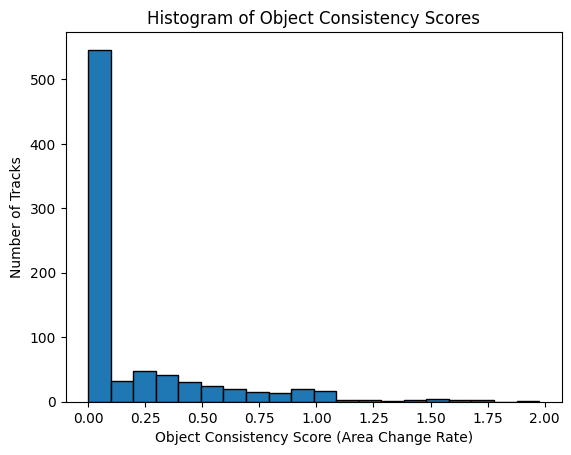

In [7]:
object_consistency_scores = []

for track in model.tracker.tracks:
    areas = [storm.contour.area for storm in track.storms.values()]
    area_changes = [abs(areas[i] - areas[i - 1]) / areas[i - 1] for i in range(1, len(areas)) if areas[i - 1] != 0]
    object_consistency_scores.append(np.mean(area_changes) if area_changes else 0)

object_consistency_scores = np.array(object_consistency_scores)

print(f"Average object consistency score (area change rate): {np.mean(object_consistency_scores):.4f}")

plt.hist(object_consistency_scores[object_consistency_scores < 2], bins=20, edgecolor='black')
plt.title("Histogram of Object Consistency Scores")
plt.xlabel("Object Consistency Score (Area Change Rate)")
plt.ylabel("Number of Tracks")
plt.show()

## B. Mean duration tracking

Median duration of tracking: 16.872756933115824 frames
Maximum duration of tracking: 89 frames
Mean duration of tracking: 16.87 frames


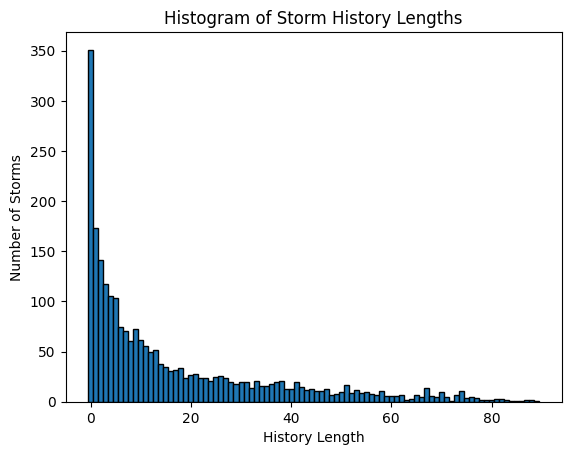

In [8]:
HISTORY_LENGTH_LST = []             # Retrieve history length of all storms

for storms_map in storms_maps:
    for storm in storms_map.storms:
        HISTORY_LENGTH_LST.append(len(storm.history_movements))   # Append history length of each storm

MEDIAN_DURATION = np.mean(HISTORY_LENGTH_LST)

print(f"Median duration of tracking: {MEDIAN_DURATION} frames")
print(f"Maximum duration of tracking: {max(HISTORY_LENGTH_LST)} frames")
print(f"Mean duration of tracking: {np.mean(HISTORY_LENGTH_LST):.2f} frames")

plt.hist(HISTORY_LENGTH_LST, bins=range(0, max(HISTORY_LENGTH_LST) + 2), align='left', edgecolor='black')
plt.title("Histogram of Storm History Lengths")
plt.xlabel("History Length")
plt.ylabel("Number of Storms")
plt.show()

## C. Linearity error tracking
Use linearity to track the different between linear fitting of previous history against the actual matched movement

In [9]:
from src.cores.metrics import linear_tracking_error
import matplotlib.pyplot as plt

# Accumulate linear errors for all storms
LINEAR_ERRORS_LST = []

for storms_map in tqdm(storms_maps, desc="Computing linear fitting errors for storms"):
    for storm in storms_map.storms:
        # If not enough history, skip
        if len(storm.history_movements) <= MEDIAN_DURATION:
            continue

        # Fit linear model
        error_distance = linear_tracking_error(storm.history_movements[:-1]) ** 2      # Final one used for evaluate the movement prediction
        LINEAR_ERRORS_LST.append(error_distance)

print(f"RMSE of linear fitting errors: {np.sqrt(np.mean(LINEAR_ERRORS_LST)):.4f}. Total length: {len(LINEAR_ERRORS_LST)}")

Computing linear fitting errors for storms: 100%|██████████| 93/93 [00:00<00:00, 734.08it/s]

RMSE of linear fitting errors: 128.4485. Total length: 858


In [10]:
import colorsys

def spectral_colors(n: int) -> list[list[int]]:
    colors = []
    for i in range(n):
        # Hue ranges from 0.0 (red) to 0.83 (violet) approximately
        hue = i / max(1, n - 1) * 0.83  
        r, g, b = colorsys.hsv_to_rgb(hue, 1.0, 1.0)
        colors.append([int(r * 255), int(g * 255), int(b * 255)])
    return colors

Processing all storm maps for movement history visualization: 100%|██████████| 93/93 [00:01<00:00, 77.14it/s] 

----  CURRENT MAP at time 2023-08-12 04:58:57  ----
Storm 0: Number of movement history records: 92
Storm 1: Number of movement history records: 6
Storm 2: Number of movement history records: 9
Storm 3: Number of movement history records: 44
Storm 4: Number of movement history records: 0
Storm 5: Number of movement history records: 1
Storm 6: Number of movement history records: 0
Storm 7: Number of movement history records: 3
Storm 8: Number of movement history records: 3


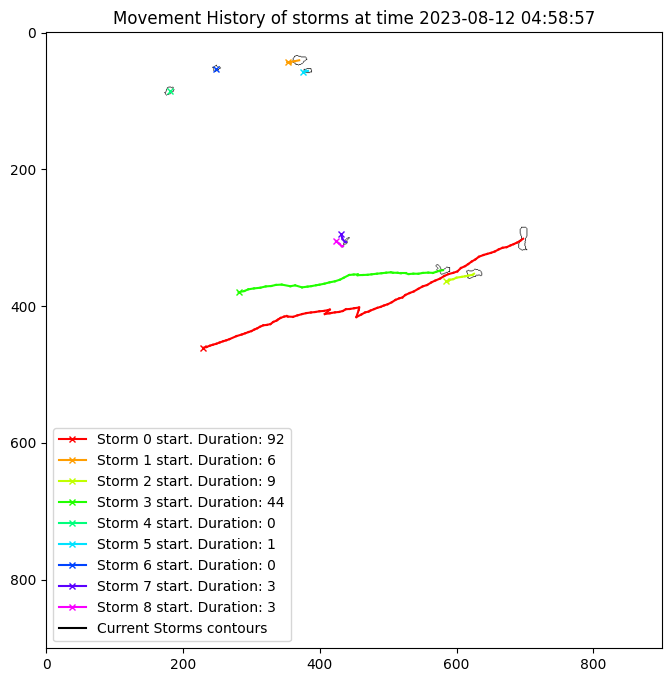

In [11]:
from src.preprocessing import convert_polygons_to_contours

num_maps = len(storms_maps)
MAX_VELOCITY = 100              # pixels per hour

model = OursPrecipitationModel(identifier=HypothesisIdentifier(), max_velocity=MAX_VELOCITY)  # max_velocity in pixels per hour

for i in tqdm(range(num_maps), desc="Processing all storm maps for movement history visualization"):
    model.processing_map(storms_maps[i])  # Warm-up phase

plt.figure(figsize=(8, 8))
blank_img = np.ones(shape=(img_shape[0], img_shape[1], 3), dtype=np.uint8) * 255

current_map = storms_maps[-1]
print(f"----  CURRENT MAP at time {current_map.time_frame.strftime('%Y-%m-%d %H:%M:%S')}  ----")

colors = spectral_colors(len(current_map.storms))

for idx, storm in enumerate(current_map.storms):
    print(f"Storm {idx}: Number of movement history records: {len(storm.history_movements)}")
    current_frame = current_map.time_frame

    color = np.array(colors[idx]) / 255.0
    end_point = (storm.contour.centroid.x, storm.contour.centroid.y)

    # backtrack the movement history
    for move_idx, movement in enumerate(storm.history_movements):
        prev_frame = storms_maps[-(move_idx + 2)].time_frame
        dt = (current_frame - prev_frame).seconds / 3600
        current_frame = prev_frame

        dy, dx = movement[0] * dt, movement[1] * dt

        start = end_point[0] - dx, end_point[1] - dy
        plt.plot([start[0], end_point[0]], [start[1], end_point[1]], color=color)
        end_point = start
    
    plt.plot(end_point[0], end_point[1], marker='x', color=color, markersize=5, label=f'Storm {idx} start. Duration: {len(storm.history_movements)}')

contours = convert_polygons_to_contours([storm.contour for storm in current_map.storms])
cv2.drawContours(blank_img, contours, -1, (0, 0, 0), 1)
plt.plot([], [], color='black', label='Current Storms contours')
plt.title(f"Movement History of storms at time {current_map.time_frame.strftime('%Y-%m-%d %H:%M:%S')}")

plt.imshow(blank_img)
plt.legend()

plt.show()

## D. Post-event analysis

### Plot histogram of track length

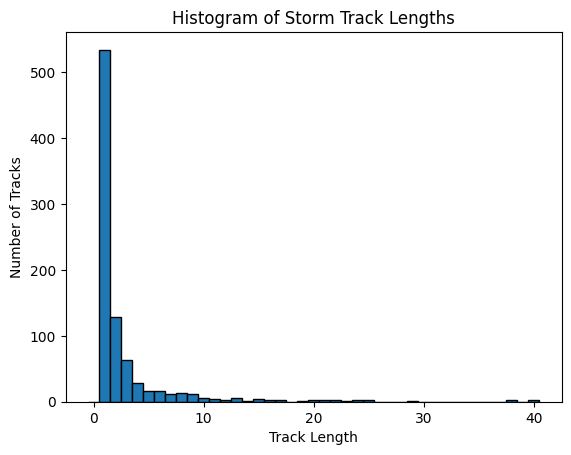

In [12]:
# Get the centroids list
centroids = []
clusters_assigned = []

def _convert_time_frame_to_seconds(time_frame: datetime) -> float:
    return time_frame.timestamp() - FIRST_TIME_FRAME.timestamp()

for track_history in model.tracker.tracks:
    track_centroids = [(storm.centroid[0], storm.centroid[1], _convert_time_frame_to_seconds(time_frame)) for time_frame, storm in track_history.storms.items()]
    centroids.extend(track_centroids)
    clusters_assigned.extend([track_history.id] * len(track_centroids))

centroids = np.array(centroids)

track_lengths = [len(track_history.storms) for track_history in model.tracker.tracks]

plt.hist(track_lengths, bins=range(0, max(track_lengths) + 2), align='left', edgecolor='black')
plt.title("Histogram of Storm Track Lengths")
plt.xlabel("Track Length")
plt.ylabel("Number of Tracks")
plt.show()

In [ ]:
from typing import Annotated
from src.cores.metrics.postevent_tracking import PostEventClustering
    
postevent_analysis = PostEventClustering(centroids, max_window_time=600, spatial_distance_threshold=20)
reassigned_clusters_centers = postevent_analysis.fit_transform(num_clusters=len(model.tracker.tracks), clusters_assigned=clusters_assigned, max_epochs=50)

active_lst = [i for i, cluster in enumerate(postevent_analysis.clusters) if cluster.is_actived]
print(f"Total {len(active_lst)} / {postevent_analysis.num_initial_clusters} Clusters active: {active_lst}")
print(f"Number of active storm tracks after post-event clustering: {len([c for c in reassigned_clusters_centers if c != -1])} / {len(reassigned_clusters_centers)}")

Post-event clustering:   0%|          | 0/50 [00:00<?, ?it/s]

Total 176 / 870 Clusters active: [0, 1, 2, 3, 4, 6, 7, 9, 11, 13, 14, 15, 17, 19, 22, 23, 24, 27, 29, 30, 33, 36, 37, 43, 44, 52, 55, 56, 57, 58, 59, 60, 63, 64, 66, 69, 71, 75, 76, 77, 78, 81, 82, 83, 87, 92, 99, 100, 101, 103, 104, 105, 112, 113, 114, 116, 117, 119, 121, 123, 126, 129, 132, 133, 134, 135, 136, 138, 142, 146, 152, 158, 160, 161, 162, 163, 164, 165, 167, 168, 170, 174, 179, 183, 185, 186, 188, 191, 192, 194, 200, 206, 208, 209, 211, 215, 216, 218, 223, 224, 230, 236, 237, 239, 241, 261, 262, 267, 268, 277, 289, 293, 294, 309, 326, 331, 349, 355, 358, 370, 383, 384, 391, 393, 394, 395, 405, 410, 414, 434, 436, 441, 452, 460, 461, 463, 464, 465, 479, 481, 482, 501, 503, 504, 506, 507, 508, 512, 517, 523, 525, 532, 537, 546, 555, 557, 560, 567, 583, 584, 587, 595, 607, 610, 611, 615, 617, 629, 631, 644, 648, 717, 721, 730, 772, 794]
Number of active storm tracks after post-event clustering: 1714 / 2452


### Scoring using Post-event analysis

In [14]:
# Convert to the merged list first
merged_clusters_assigned = [postevent_analysis.clusters_merged_dict.get(i, i) for i in clusters_assigned]
print(f"Update after merged, total change: {len([1 for i in range(len(clusters_assigned)) if merged_clusters_assigned[i] != clusters_assigned[i]])}")

# Scoring: 1 if match best clusters, 0.5 if match wrong clusters and 0 if storm is dropped
score_lst = [1 if merged_clusters_assigned[i] == reassigned_clusters_centers[i] else 0.5 if reassigned_clusters_centers[i] != -1 else 0 for i in range(len(clusters_assigned))]
print(f"Post-event clustering scoring results: {sum(score_lst) / len(score_lst):.4f}")

Update after merged, total change: 0
Post-event clustering scoring results: 0.4929
